In [1]:
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
stocks = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]

In [3]:
def extract_sp(stocks, start, end):
    def data(ticker):
        return pdr.get_data_yahoo(ticker, start, end)
    datas = map(data, stocks)
    #keys is for first index, original index as second index, names it's for multiple index's names
    return pd.concat(datas, keys=stocks, names=["Company","Date"])

In [4]:
#I don't know why I have to extract ticker one by one,and using the map, then make it multil index???
#I guess just a way prof roh want to show us how to handle data
#So that's why I define it as crazy_data, cuz the way to extract data is crazy
crazy_data = extract_sp(stocks, dt.datetime(2010,1,1), dt.datetime(2021,1,1))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
crazy_data

Open       High        Low      Close  Adj Close  \
Company Date                                                                
META    2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
        2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
        2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
        2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
        2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   
...                       ...        ...        ...        ...        ...   
GOOG    2020-12-24  86.750000  87.300003  86.455498  86.942497  86.942497   
        2020-12-28  87.581749  89.536400  87.316750  88.804497  88.804497   
        2020-12-29  89.389503  89.622002  87.804497  87.935997  87.935997   
        2020-12-30  88.100502  88.254753  86.279999  86.975998  86.975998   
        2020-12-31  86.771004  87.946503  86.771004  87.594002  87.594002   

                       Volume  
Company Date                   
META    2012-05-18  573576400  
        2012-05-21  168192700  
        2012-05-22  101786600  
        2012-05-23   73600000  
        2012-05-24   50237200  
...                       ...  
GOOG    2020-12-24    6936000  
        2020-12-28   27860000  
        2020-12-29   25988000  
        2020-12-30   26122000  
        2020-12-31   20238000  

[13246 rows x 6 columns]

In [6]:
#And we only want Adj Close, and don't want the data looks so crazy
#let multi index become no index
less_crazy_data = crazy_data[["Adj Close"]].reset_index()
less_crazy_data

,Company,Date,Adj Close
0,META,2012-05-18,38.230000
1,META,2012-05-21,34.029999
2,META,2012-05-22,31.000000
3,META,2012-05-23,32.000000
4,META,2012-05-24,33.029999
...,...,...,...
13241,GOOG,2020-12-24,86.942497
13242,GOOG,2020-12-28,88.804497
13243,GOOG,2020-12-29,87.935997
13244,GOOG,2020-12-30,86.975998


In [7]:
#And for series also has reset_index function, so can just try
#series not df
crazy_data["Adj Close"].reset_index()

,Company,Date,Adj Close
0,META,2012-05-18,38.230000
1,META,2012-05-21,34.029999
2,META,2012-05-22,31.000000
3,META,2012-05-23,32.000000
4,META,2012-05-24,33.029999
...,...,...,...
13241,GOOG,2020-12-24,86.942497
13242,GOOG,2020-12-28,88.804497
13243,GOOG,2020-12-29,87.935997
13244,GOOG,2020-12-30,86.975998


In [8]:
# we want normal data...
normal_data = less_crazy_data.pivot(index = "Date", columns = "Company", values = "Adj Close")
normal_data

Company,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2010-01-04,6.487534,6.695000,15.610239,NaN,7.640000
2010-01-05,6.498751,6.734500,15.541497,NaN,7.358571
2010-01-06,6.395378,6.612500,15.149715,NaN,7.617143
2010-01-07,6.383555,6.500000,14.797037,NaN,7.485714
2010-01-08,6.425995,6.676000,14.994298,NaN,7.614286
...,...,...,...,...,...
2020-12-24,129.850601,158.634506,86.942497,267.399994,513.969971
2020-12-28,134.494781,164.197998,88.804497,277.000000,519.119995
2020-12-29,132.704010,166.100006,87.935997,276.779999,530.869995


In [9]:
#we only want AMZN data
AMZN = normal_data[["AMZN"]]
AMZN

Company,AMZN
Date,
2010-01-04,6.695000
2010-01-05,6.734500
2010-01-06,6.612500
2010-01-07,6.500000
2010-01-08,6.676000
...,...
2020-12-24,158.634506
2020-12-28,164.197998
2020-12-29,166.100006


In [10]:
window = 40

In [11]:
#rolling #mean
AMZN[f"SMA_{window}"] = AMZN.rolling(window).mean()
AMZN

Company,AMZN,SMA_40
Date,,
2010-01-04,6.695000,NaN
2010-01-05,6.734500,NaN
2010-01-06,6.612500,NaN
2010-01-07,6.500000,NaN
2010-01-08,6.676000,NaN
...,...,...
2020-12-24,158.634506,157.856350
2020-12-28,164.197998,157.947538
2020-12-29,166.100006,158.304850


In [12]:
AMZN.iloc[:40]

Company,AMZN,SMA_40
Date,,
2010-01-04,6.6950,NaN
2010-01-05,6.7345,NaN
2010-01-06,6.6125,NaN
2010-01-07,6.5000,NaN
2010-01-08,6.6760,NaN
2010-01-11,6.5155,NaN
2010-01-12,6.3675,NaN
2010-01-13,6.4555,NaN
2010-01-14,6.3675,NaN


In [13]:
#rolling max()\min()\median()\std()
AMZN["max"] = AMZN["AMZN"].rolling(window).max()
AMZN["min"] = AMZN["AMZN"].rolling(window).min()
AMZN["median"] = AMZN["AMZN"].rolling(window).median()
AMZN["std"] = AMZN["AMZN"].rolling(window).std()
AMZN

Company,AMZN,SMA_40,max,min,median,std
Date,,,,,,
2010-01-04,6.695000,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.734500,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.612500,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.500000,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.676000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-24,158.634506,157.856350,166.100006,150.223999,158.014496,3.410286
2020-12-28,164.197998,157.947538,166.100006,150.223999,158.014496,3.530808
2020-12-29,166.100006,158.304850,166.100006,150.223999,158.192497,3.615682


In [14]:
#so halflife here means over 1 period the weigh decrease half
#6.696   0.5x 0.5/1.5  
#6.7345  x    1/1.5
#6.696*(0.5/1.5) + 6.7345*（1/1.5） = 6.721333
AMZN["AMZN"].ewm(halflife=1, min_periods = 2).mean()

Date
2010-01-04           NaN
2010-01-05      6.721333
2010-01-06      6.659143
2010-01-07      6.574267
2010-01-08      6.626774
                 ...    
2020-12-24    159.220954
2020-12-28    161.709476
2020-12-29    163.904741
2020-12-30    164.098618
2020-12-31    163.472557
Name: AMZN, Length: 2769, dtype: float64

In [15]:
AMZN["EMAS"] = AMZN["AMZN"].ewm(halflife = 0.5, min_periods = window).mean()
AMZN

Company,AMZN,SMA_40,max,min,median,std,EMAS
Date,,,,,,,
2010-01-04,6.695000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.734500,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.612500,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.500000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.676000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-12-24,158.634506,157.856350,166.100006,150.223999,158.014496,3.410286,158.858506
2020-12-28,164.197998,157.947538,166.100006,150.223999,158.014496,3.530808,162.863125
2020-12-29,166.100006,158.304850,166.100006,150.223999,158.192497,3.615682,165.290786


In [16]:
AMZN = AMZN.dropna()

In [17]:
AMZN.head()

Company,AMZN,SMA_40,max,min,median,std,EMAS
Date,,,,,,,
2010-03-02,6.2765,6.141887,6.7345,5.797,6.01,0.280447,6.244965
2010-03-03,6.2945,6.131875,6.7345,5.797,6.01,0.267022,6.282116
2010-03-04,6.4265,6.124175,6.6760,5.797,6.01,0.253286,6.390404
2010-03-05,6.4455,6.120000,6.6760,5.797,6.01,0.246311,6.431726
2010-03-08,6.5055,6.120137,6.6760,5.797,6.01,0.246530,6.487056


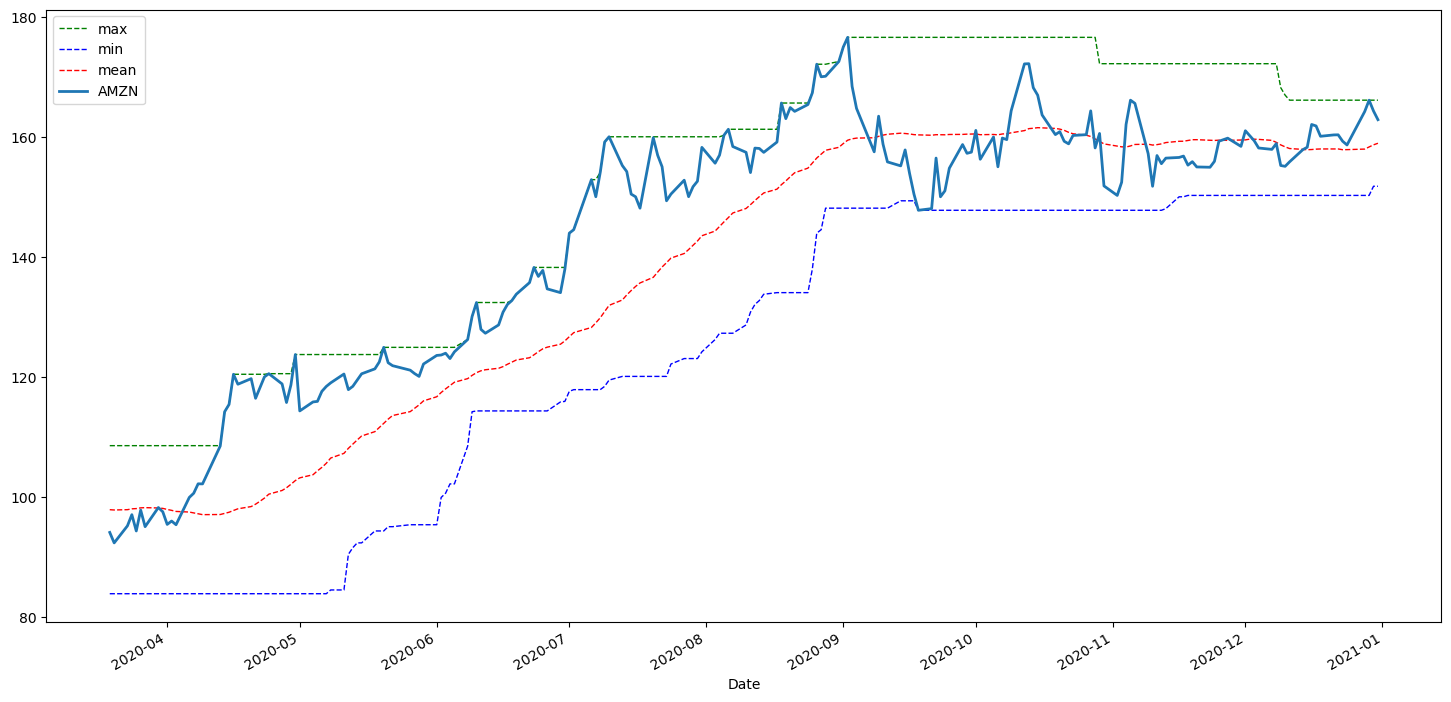

In [30]:
#I want last 200 days data
#I want rolling mean\max\mean
#I want AMZN data
ax.clear()
ax = (
    AMZN[["max", "min", "SMA_40"]].iloc[-200:].plot(
        figsize = [18,9],
        style = ["g--", "b--", "r--"], 
        lw = 1,
        #label = ["max", "min", "mean"], # it seems like it's not working using label here
    )
)

AMZN["AMZN"][-200:].plot(ax = ax, lw = 2)

ax.legend(["max", "min", "mean", "AMZN"])

#plt.legend() #ax.lengend() will fail when use plt.legend()

plt.show()

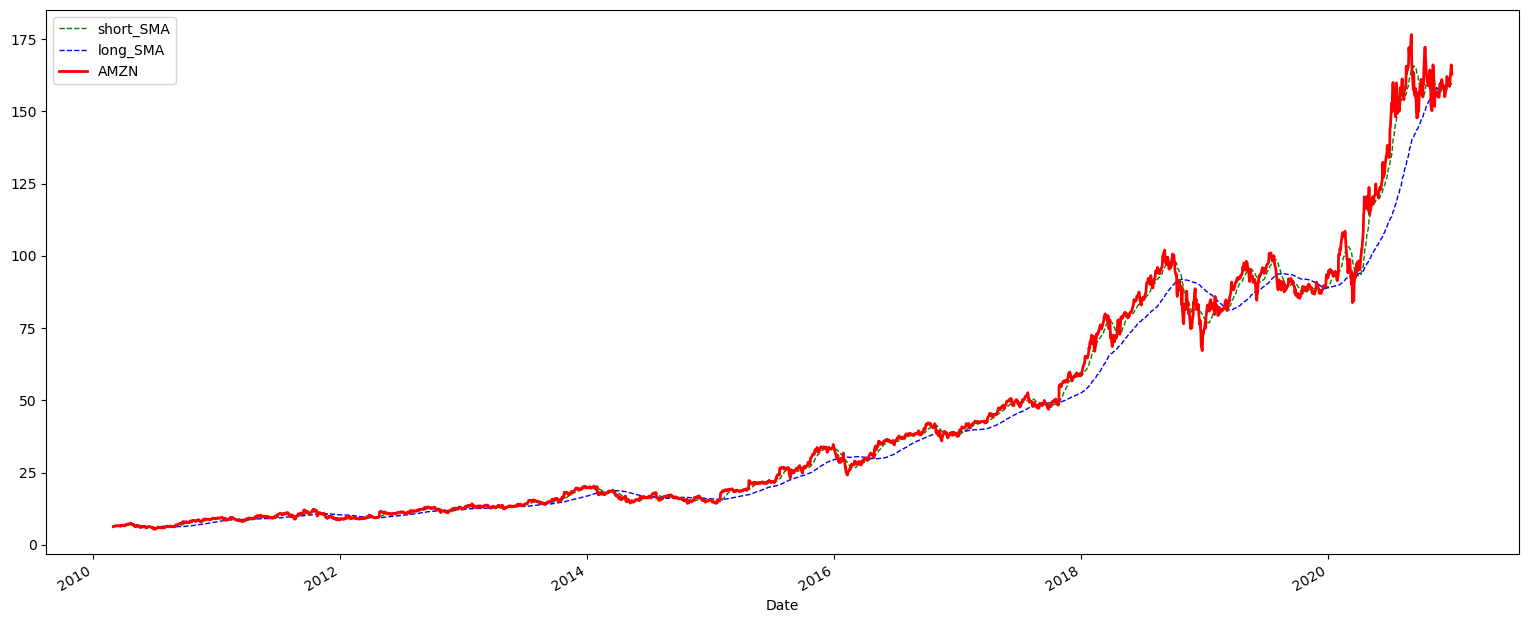

In [36]:
#this time we want
#short_SMA = 20, long_SMA = 100, AMZN
short = 20
long = 100

AMZN["short_SMA"] = AMZN["AMZN"].rolling(short).mean()
AMZN["long_SMA"] = AMZN["AMZN"].rolling(long).mean()

ax = AMZN[["short_SMA", "long_SMA"]].plot(figsize = (19,8), lw = 1, style=["g--","b--"])
AMZN["AMZN"].plot(ax = ax, lw = 2, style="r-")
ax.legend(["short_SMA", "long_SMA", "AMZN"])
plt.show()

In [37]:
AMZN

Company,AMZN,SMA_40,max,min,median,std,EMAS,short_SMA,long_SMA
Date,,,,,,,,,
2010-03-02,6.276500,6.141887,6.734500,5.797000,6.010000,0.280447,6.244965,NaN,NaN
2010-03-03,6.294500,6.131875,6.734500,5.797000,6.010000,0.267022,6.282116,NaN,NaN
2010-03-04,6.426500,6.124175,6.676000,5.797000,6.010000,0.253286,6.390404,NaN,NaN
2010-03-05,6.445500,6.120000,6.676000,5.797000,6.010000,0.246311,6.431726,NaN,NaN
2010-03-08,6.505500,6.120137,6.676000,5.797000,6.010000,0.246530,6.487056,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-24,158.634506,157.856350,166.100006,150.223999,158.014496,3.410286,158.858506,158.912850,159.735235
2020-12-28,164.197998,157.947538,166.100006,150.223999,158.014496,3.530808,162.863125,159.134400,159.774700
2020-12-29,166.100006,158.304850,166.100006,150.223999,158.192497,3.615682,165.290786,159.519301,159.823200


In [38]:
#let's drop NaN first
AMZN.dropna(inplace=True)
AMZN

Company,AMZN,SMA_40,max,min,median,std,EMAS,short_SMA,long_SMA
Date,,,,,,,,,
2010-07-22,6.003500,6.017088,6.438000,5.430500,6.086500,0.264420,5.978622,5.841550,6.419495
2010-07-23,5.943500,6.011663,6.438000,5.430500,6.061250,0.263627,5.952281,5.842900,6.416165
2010-07-26,5.920000,6.001288,6.438000,5.430500,6.027500,0.258696,5.928070,5.836400,6.412420
2010-07-27,5.856500,5.990875,6.438000,5.430500,6.004250,0.255845,5.874393,5.834725,6.406720
2010-07-28,5.856500,5.983238,6.438000,5.430500,6.000250,0.255165,5.860973,5.856025,6.400830
...,...,...,...,...,...,...,...,...,...
2020-12-24,158.634506,157.856350,166.100006,150.223999,158.014496,3.410286,158.858506,158.912850,159.735235
2020-12-28,164.197998,157.947538,166.100006,150.223999,158.014496,3.530808,162.863125,159.134400,159.774700
2020-12-29,166.100006,158.304850,166.100006,150.223999,158.192497,3.615682,165.290786,159.519301,159.823200


In [39]:
AMZN["Trading Position"] = np.where(AMZN["short_SMA"]>AMZN["long_SMA"], 1, -1)
AMZN

Company,AMZN,SMA_40,max,min,median,std,EMAS,short_SMA,long_SMA,Trading Position
Date,,,,,,,,,,
2010-07-22,6.003500,6.017088,6.438000,5.430500,6.086500,0.264420,5.978622,5.841550,6.419495,-1
2010-07-23,5.943500,6.011663,6.438000,5.430500,6.061250,0.263627,5.952281,5.842900,6.416165,-1
2010-07-26,5.920000,6.001288,6.438000,5.430500,6.027500,0.258696,5.928070,5.836400,6.412420,-1
2010-07-27,5.856500,5.990875,6.438000,5.430500,6.004250,0.255845,5.874393,5.834725,6.406720,-1
2010-07-28,5.856500,5.983238,6.438000,5.430500,6.000250,0.255165,5.860973,5.856025,6.400830,-1
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,158.634506,157.856350,166.100006,150.223999,158.014496,3.410286,158.858506,158.912850,159.735235,-1
2020-12-28,164.197998,157.947538,166.100006,150.223999,158.014496,3.530808,162.863125,159.134400,159.774700,-1
2020-12-29,166.100006,158.304850,166.100006,150.223999,158.192497,3.615682,165.290786,159.519301,159.823200,-1


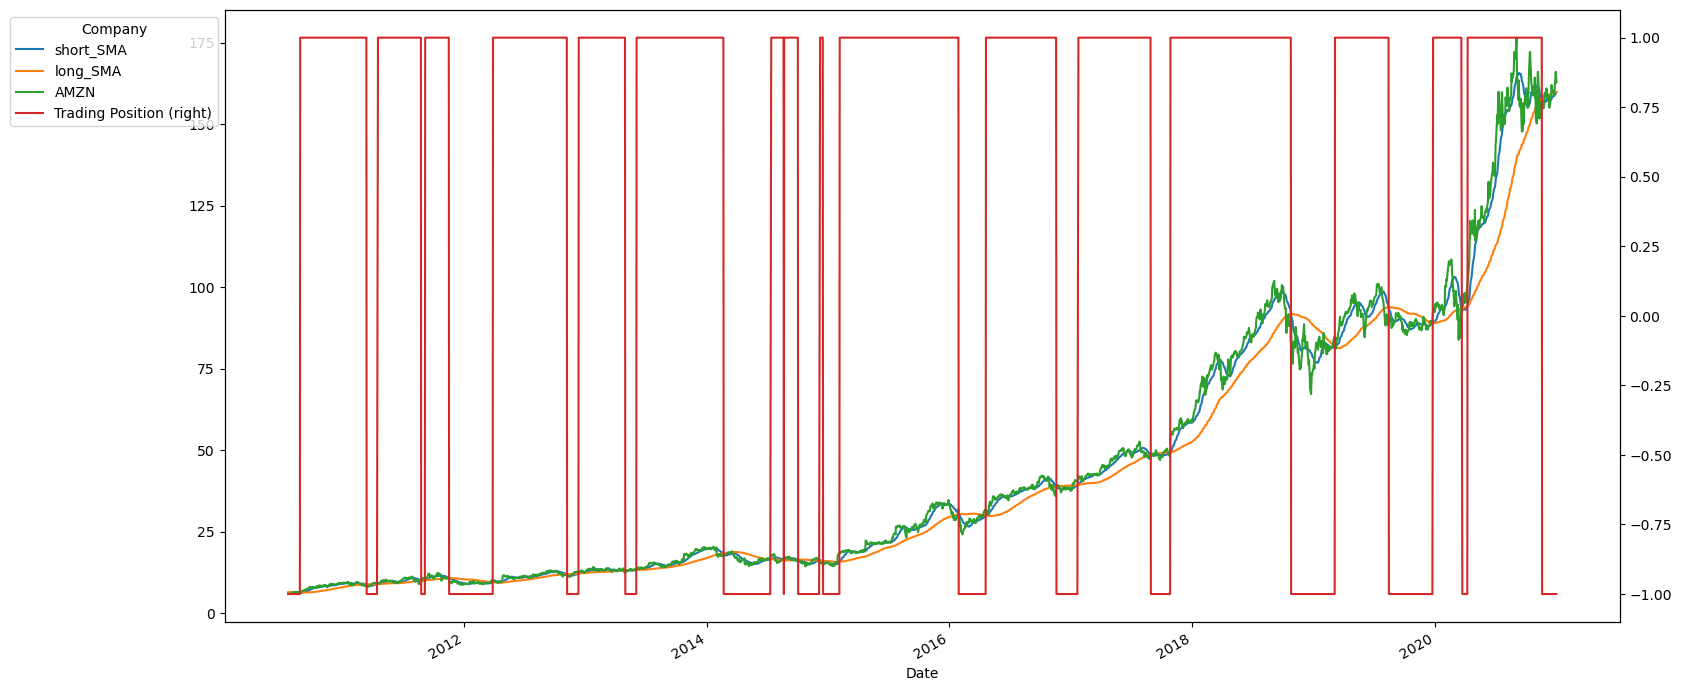

In [50]:
#now we want to add one more is the trading position and we want to set it as a secondary y axis
ax = AMZN[["short_SMA", "long_SMA", "AMZN", "Trading Position"]].plot(secondary_y = "Trading Position", figsize = [18,9])

ax.get_legend().set_bbox_to_anchor((0,1))

In [51]:
META = pdr.get_data_yahoo("META", dt.datetime(2014,3,1), dt.datetime(2023,2,15))

META.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-08,190.000000,190.830002,182.919998,183.429993,183.429993,36139100
2023-02-09,186.130005,186.649994,177.270004,177.919998,177.919998,37118800
2023-02-10,176.350006,178.889999,173.350006,174.149994,174.149994,33433600
2023-02-13,178.220001,181.000000,175.820007,179.429993,179.429993,31463200
2023-02-14,177.160004,181.509995,175.880005,179.479996,179.479996,24034600


In [52]:
short = 20
long = 60

In [53]:
Buy_or_Sell = pd.DataFrame(index = META.index)
Buy_or_Sell

""
Date
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
...
2023-02-08
2023-02-09
2023-02-10


In [54]:
Buy_or_Sell["Buy_or_Sell"] = 0
Buy_or_Sell

,Buy_or_Sell
Date,
2014-03-03,0
2014-03-04,0
2014-03-05,0
2014-03-06,0
2014-03-07,0
...,...
2023-02-08,0
2023-02-09,0
2023-02-10,0


In [71]:
#min_periods here means need at least how much data as a rolling window
#and the center here means as a data in center, stretch out in two direction, but usually we get rolling window from history
Buy_or_Sell["short_SMA"] = META["Close"].rolling(window=short, min_periods = 1, center = False).mean()

Buy_or_Sell["long_SMA"] = META["Close"].rolling(window=long, min_periods = 1, center = False).mean()

Buy_or_Sell

,Buy_or_Sell,short_SMA,long_SMA
Date,,,
2014-03-03,0,67.410004,67.410004
2014-03-04,0,68.105003,68.105003
2014-03-05,0,69.260002,69.260002
2014-03-06,0,69.655001,69.655001
2014-03-07,0,69.684001,69.684001
...,...,...,...
2023-02-08,0,153.149500,129.568667
2023-02-09,0,155.400999,130.650334
2023-02-10,0,157.272999,131.649167


In [73]:
#The reason start with short not from long, is that in some way this also show some momentum
#if in [short:long] period, short_SMA > long_SMA means that begining period price actually lower than [short:long] period price
#so in some way it makes sense
Buy_or_Sell["Buy_or_Sell"][short:] = np.where(Buy_or_Sell["short_SMA"][short:] >Buy_or_Sell["long_SMA"][short:], 1, 0)
Buy_or_Sell

,Buy_or_Sell,short_SMA,long_SMA
Date,,,
2014-03-03,0,67.410004,67.410004
2014-03-04,0,68.105003,68.105003
2014-03-05,0,69.260002,69.260002
2014-03-06,0,69.655001,69.655001
2014-03-07,0,69.684001,69.684001
...,...,...,...
2023-02-08,1,153.149500,129.568667
2023-02-09,1,155.400999,130.650334
2023-02-10,1,157.272999,131.649167


In [75]:
#here I think buy_or_sell should be an action, an position should be a state
Buy_or_Sell.rename(columns = {"Buy_or_Sell": "position"}, inplace = True)
Buy_or_Sell


,position,short_SMA,long_SMA
Date,,,
2014-03-03,0,67.410004,67.410004
2014-03-04,0,68.105003,68.105003
2014-03-05,0,69.260002,69.260002
2014-03-06,0,69.655001,69.655001
2014-03-07,0,69.684001,69.684001
...,...,...,...
2023-02-08,1,153.149500,129.568667
2023-02-09,1,155.400999,130.650334
2023-02-10,1,157.272999,131.649167


In [76]:
Buy_or_Sell["buy_or_sell"] = Buy_or_Sell["position"].diff()
Buy_or_Sell

,position,short_SMA,long_SMA,buy_or_sell
Date,,,,
2014-03-03,0,67.410004,67.410004,NaN
2014-03-04,0,68.105003,68.105003,0.0
2014-03-05,0,69.260002,69.260002,0.0
2014-03-06,0,69.655001,69.655001,0.0
2014-03-07,0,69.684001,69.684001,0.0
...,...,...,...,...
2023-02-08,1,153.149500,129.568667,0.0
2023-02-09,1,155.400999,130.650334,0.0
2023-02-10,1,157.272999,131.649167,0.0


<Axes: ylabel='bottom right'>

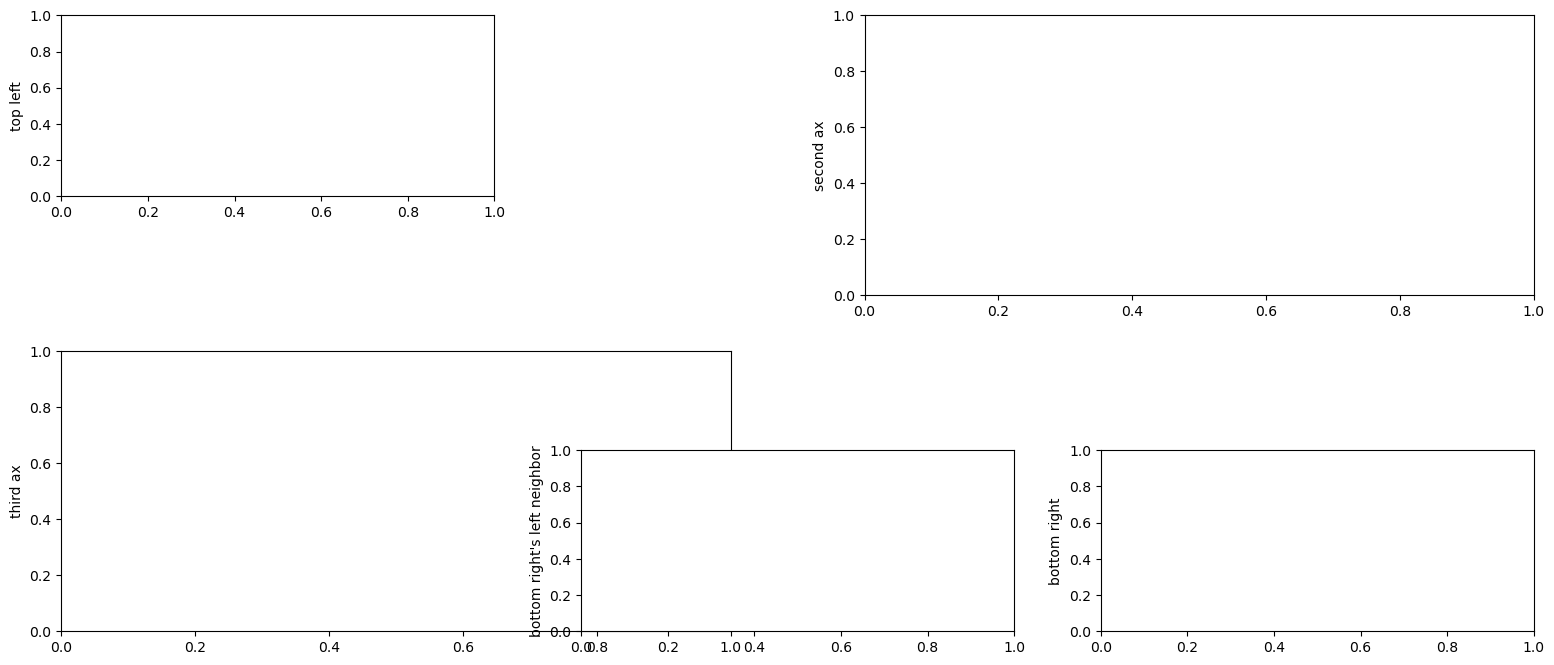

In [87]:
#it's so funny, help me to understand fig and ax's different and how can I put them
#1 should in top left
fig = plt.figure(figsize = [19,8])
sub = fig.add_subplot(331, ylabel="top left")
fig.add_subplot(222, ylabel = "second ax")
fig.add_subplot(223, ylabel = "third ax")
fig.add_subplot(338, ylabel = "bottom right's left neighbor")
fig.add_subplot(339, ylabel = "bottom right")

<Axes: xlabel='Date'>

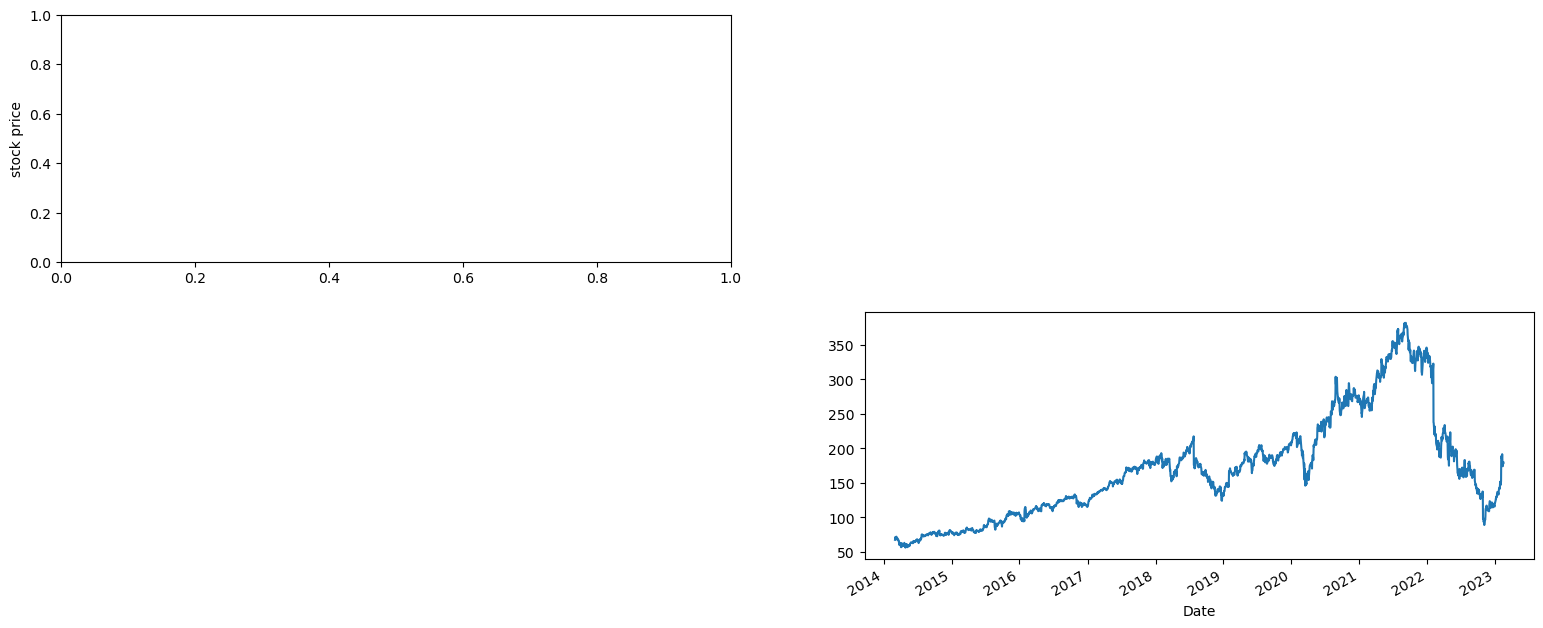

In [94]:
fig = plt.figure(figsize = [19,8])
sub = fig.add_subplot(221,ylabel="stock price")

# if I don't set ax = ax then it will go to the nearest ax
META["Close"].plot()